# 경사 하강법(Gradient Descent)

# I. Machine( ) 정의

* numpy Package

In [0]:
import numpy as np

* def Machine( )

In [0]:
def Machine(x, w, b):
    y_hat = (w * x) + b
    return y_hat

* x, w, b 객체 지정

In [0]:
x = np.array([1, 3, 5, 7, 9])
w = 2
b = 1

* Machine( ) 테스트

In [0]:
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

# II. Gradient( ) 정의
* def Gradient( )

In [0]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)

    dw = np.mean((y - y_hat) * (-2 * x))
    db = np.mean((y - y_hat) * (-2))

    GDs = np.array([dw, db])
    return GDs

* Gradient( ) 테스트

In [0]:
y = np.array([2, 4, 6, 8, 10])

GDs = Gradient(x, y, w, b)

In [0]:
print('dw is ', GDs[0])
print('db is ', GDs[1])

dw is  66.0
db is  10.0


# III. Learning( ) 정의
* def Learning( )

In [0]:
def Learning(x, y, w, b, step):
    GDs = Gradient(x, y, w, b)
    
    uw = w - step * GDs[0]
    ub = b - step * GDs[1]

    Updated = np.array([uw, ub])
    return Updated

* Learning( ) 테스트

In [0]:
step = 0.05

Parameters = Learning(x, y, w, b, step)

In [0]:
print('Updated_w is ', '%.3f' % Parameters[0])
print('Updated_b is ', '%.3f' % Parameters[1])

Updated_w is  -1.300
Updated_b is  0.500


# IV. testData.csv에 적용

* pandas & matplotlib Packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

* Colab File Upload

In [0]:
from google.colab import files

uploaded = files.upload()

Saving testData.csv to testData.csv


In [0]:
!ls -l

total 132
drwxr-xr-x 1 root root   4096 Feb  5 18:37 sample_data
-rw-r--r-- 1 root root 128698 Feb 13 01:30 testData.csv


* testData.csv Information

In [0]:
DATA = pd.read_csv('testData.csv')

In [0]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
inputs     5000 non-null float64
outputs    5000 non-null float64
dtypes: float64(2)
memory usage: 78.2 KB


In [0]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


* testData.csv Visualization

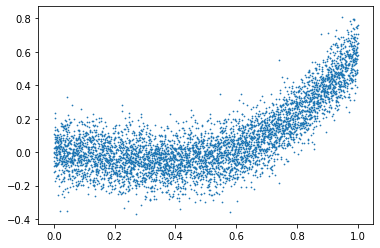

In [0]:
plt.scatter(DATA.inputs, DATA.outputs, s = 0.5)
plt.show()

* 1500번 학습 실행

In [0]:
w = 2
b = 3
step = 0.05

In [0]:
for i in range(0, 1500):
    Parameters = Learning(DATA.inputs, DATA.outputs, w, b, step)
    w = Parameters[0]
    b = Parameters[1]

In [0]:
print('Learned_w is ', '%.3f' % w)
print('Learned_b is ', '%.3f' % b)

Learned_w is  0.505
Learned_b is  -0.170


* 학습결과 회귀선 그리기

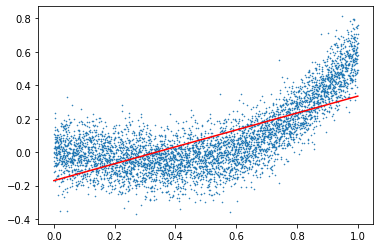

In [0]:
X = np.linspace(0, 1, 100)
Y = (w * X) + b

plt.scatter(DATA.inputs, DATA.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()

# V. scipy Package
* stats.linregress( )

In [0]:
from scipy import stats

w2, b2, r_value, p_value, std_err = \
    stats.linregress(DATA.inputs, DATA.outputs)

In [0]:
print("Learned_w2 is ", '%.3f' % w2)
print("Learned_b2 is ", '%.3f' % b2)

Learned_w2 is  0.505
Learned_b2 is  -0.170


* Visualization

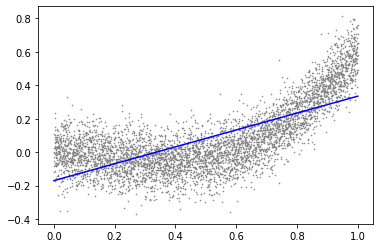

In [0]:
X = np.linspace(0, 1, 100)
Y = (w2 * X) + b2

plt.scatter(DATA.inputs, DATA.outputs, s = 0.3, color = 'gray')
plt.plot(X, Y, '-b', linewidth = 1.5)
plt.show()

# VI. Loss Visualization

* Gradient( )에 Loss 추가

In [0]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)
    
    dw = np.mean((y - y_hat) * (-2 * x))
    db = np.mean((y - y_hat) * (-2))
    Loss = np.mean((y - y_hat)**2)

    GDs = np.array([dw, db, Loss])
    return GDs

* Learning( )에 Loss 추가

In [0]:
def Learning(x, y, w, b, step):
    GDs = Gradient(x, y, w, b)
    
    uw = w - step * GDs[0]
    ub = w - step * GDs[1]
    
    Loss = GDs[2]
    
    Updated = np.array([uw, ub, Loss])
    return Updated

* 1500번 학습 실행

In [0]:
w = 2
b = 3
step = 0.001
Loss = []

In [0]:
for i in range(0, 1500):
    Parameters = Learning(DATA.inputs, DATA.outputs, w, b, step)
    w = Parameters[0]
    b = Parameters[1]
    Loss.append(Parameters[2])

* Loss 감소 확인

In [0]:
Loss[0:10]

[15.595575679087696,
 8.69089938668475,
 8.66809956633206,
 8.639564220815696,
 8.611129682389118,
 8.582789837087088,
 8.554544374103527,
 8.526392977931256,
 8.498335334125741,
 8.470371129295293]

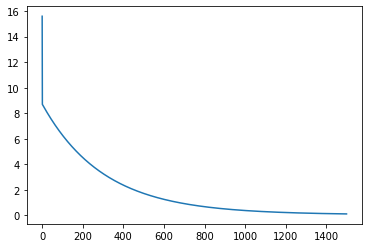

In [0]:
plt.plot(Loss)
plt.show()

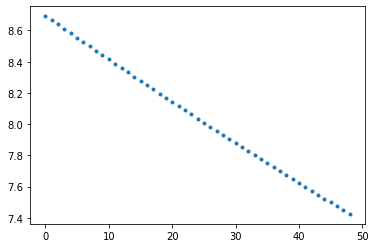

In [0]:
plt.plot(Loss[1:50], '.')
plt.show()

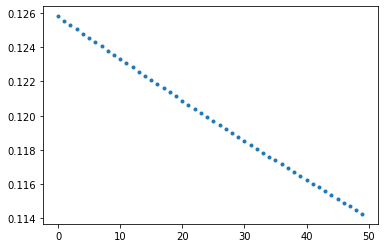

In [0]:
plt.plot(Loss[1450:1500], '.')
plt.show()

# 
# 
# 
# The End
# 
# 
# 